In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [2]:
pd.__version__

'0.25.3'

In [3]:
from sklearn.linear_model import LinearRegression

## Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [5]:
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [6]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20'],
      dtype='object')

In [7]:
df_deaths.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20'],
      dtype='object')

In [8]:
last_date = df_deaths.columns[-1]
print(last_date)

4/2/20


In [9]:
df_deaths[df_deaths["Country/Region"] == "United Kingdom"]

# df_deaths[df_deaths["Country/Region"] == "US"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
217,Bermuda,United Kingdom,32.3078,-64.7505,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
219,Channel Islands,United Kingdom,49.3723,-2.3644,0,0,0,0,0,0,...,0,0,1,1,1,2,2,3,3,3
220,Gibraltar,United Kingdom,36.1408,-5.3536,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221,Isle of Man,United Kingdom,54.2361,-4.5481,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
222,Montserrat,United Kingdom,16.7425,-62.1874,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,422,465,578,759,1019,1228,1408,1789,2352,2921
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
source = '../dataset_covid/covid19countryinfo.csv'
cols = ['region','country','pop','tests','testpop','density','medianage','urbanpop','quarantine','schools','hospibed','smokers','sex0','sex14','sex25','sex54','sex64','sex65plus','sexratio','lung','femalelung','malelung']
descritive_df = pd.read_csv(source, usecols=cols, quotechar='"', engine='python', sep=',', error_bad_lines=False)
descritive_df["pop"] = descritive_df["pop"].str.replace(",","").astype(float)


In [11]:
descritive_df[descritive_df['country'] == 'Netherlands']

,region,country,pop,tests,testpop,density,medianage,urbanpop,quarantine,schools,...,sex0,sex14,sex25,sex54,sex64,sex65plus,sexratio,lung,femalelung,malelung
7,Aruba,Netherlands,106766.0,NaN,NaN,593.0,41.0,44.0,NaN,NaN,...,1.02,1.01,1.01,0.93,0.87,0.64,0.90,NaN,NaN,NaN
130,Curacao,Netherlands,164093.0,NaN,NaN,370.0,41.6,88.7,NaN,NaN,...,1.05,1.04,1.09,0.96,0.76,0.70,0.92,NaN,NaN,NaN
131,Sint Maarten,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.05,1.09,0.98,0.95,0.92,0.92,0.98,NaN,NaN,NaN
132,NaN,Netherlands,17134872.0,6000.0,2855.812,508.0,43.0,92.0,NaN,3/15/2020,...,1.05,1.05,1.04,1.01,0.99,0.82,0.98,26.0,22.74,30.36


In [12]:
descritive_df = descritive_df.dropna(how='all')

In [13]:
#descritive_df[descritive_df['country']=='US']

In [14]:
quarantine_countries = list(descritive_df[(descritive_df["region"].isna()) & (descritive_df["quarantine"].isna() == False)]["country"])

In [15]:
quarantine_df = descritive_df[(descritive_df["region"].isna()) & (descritive_df["quarantine"].isna() == False)][["country", "quarantine"]]

In [16]:
date_str = str(list(quarantine_df[quarantine_df["country"] == "United Kingdom"]["quarantine"])[0])
print(date_str)
the_date = datetime.datetime.strptime(date_str, '%m/%d/%Y')
print(the_date)

3/23/2020
2020-03-23 00:00:00


In [17]:
for c in quarantine_df['country']:
    quarantine_df.loc[quarantine_df['country'] == c, 'quarantine_date'] = datetime.datetime.strptime(str(list(quarantine_df[quarantine_df['country'] == c]['quarantine'])[0]), '%m/%d/%Y')
quarantine_df


,country,quarantine,quarantine_date
5,Argentina,3/20/2020,2020-03-20
9,Austria,3/16/2020,2020-03-16
16,Belgium,3/18/2020,2020-03-18
35,Colombia,3/25/2020,2020-03-25
43,Czechia,3/17/2020,2020-03-17
44,Denmark,3/16/2020,2020-03-16
51,El Salvador,3/12/2020,2020-03-12
60,France,3/17/2020,2020-03-17
69,Germany,3/21/2020,2020-03-21
86,India,3/25/2020,2020-03-25


In [18]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,74,84,94,110,110,120,170,174,237,273
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,123,146,174,186,197,212,223,243,259,277
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,264,302,367,409,454,511,584,716,847,986
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,164,188,224,267,308,334,370,376,390,428
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,4,4,5,7,7,7,8,8


## Data using population ratio

In [19]:
df_pop_ratio = df[df["Province/State"].isna()]
all_t = [col for col in df.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]

all_countries_from_df = list(df_pop_ratio["Country/Region"])
all_countries_with_descriptive = list(descritive_df[descritive_df["region"].isna()]["country"])
all_full_countries = list(set(all_countries_from_df).intersection(all_countries_with_descriptive))

# print(all_full_countries)
for country in all_full_countries:
    for t in all_t:
#         print(country, ' - ', descritive_df[descritive_df["country"] == country]["pop"])
        raw_val = int(list(df_pop_ratio[df_pop_ratio["Country/Region"] == country][t])[0])
        raw_pop = int(list(descritive_df[(descritive_df["country"] == country) & (descritive_df["region"].isna())]["pop"])[0])
        df_pop_ratio.loc[df_pop_ratio["Country/Region"] == country, t] = raw_val / raw_pop
#         print(df_pop_ratio[df_pop_ratio["Country/Region"] == country][t])
#         print(country, ' - ', descritive_df[descritive_df["country"] == country]["pop"])

/anaconda3/envs/playground37/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
df_deaths_pop_ratio = df_deaths[df_deaths["Province/State"].isna()]
all_t = [col for col in df_deaths.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]

all_countries_from_df = list(df_deaths_pop_ratio["Country/Region"])
# all_countries_with_descriptive = list(descritive_df["country"])
all_countries_with_descriptive = list(descritive_df[descritive_df["region"].isna()]["country"])

all_full_countries = list(set(all_countries_from_df).intersection(all_countries_with_descriptive))

# print(all_full_countries)
for country in all_full_countries:
    for t in all_t:
#         print(country, ' - ', descritive_df[descritive_df["country"] == country]["pop"])
        raw_val = int(list(df_deaths_pop_ratio[df_deaths_pop_ratio["Country/Region"] == country][t])[0])
        raw_pop = int(list(descritive_df[(descritive_df["country"] == country) & (descritive_df["region"].isna())]["pop"])[0])
        df_deaths_pop_ratio.loc[df_deaths_pop_ratio["Country/Region"] == country, t] = raw_val / raw_pop
#         print(df_pop_ratio[df_pop_ratio["Country/Region"] == country][t])
#         print(country, ' - ', descritive_df[descritive_df["country"] == country]["pop"])

## Data fitering and pivoting

### Pick countries of interest

In [21]:
selected_countries= ['France', 'Italy', 'Spain', 'Turkey']
# selected_countries= ['France', 'Germany', 'United Kingdom', 'Italy', 'Spain', 'Netherlands', 'Turkey']
# selected_countries = []

# if len(selected_countries) == 0:
#     selected_countries = all_full_countries
    
# Korea, South'

In [22]:
#list(df['Country/Region'])

In [23]:
# df_deaths[df_deaths['Country/Region'] == 'Korea, South']

### Filter

In [24]:
countries = df['Country/Region'].unique()
df_filtered = df[df['Country/Region'].isin(selected_countries) & df['Province/State'].isna()]
df_filtered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
116,NaN,France,46.2276,2.2137,0,0,2,3,3,3,...,22304,25233,29155,32964,37575,40174,44550,52128,56989,59105
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,69176,74386,80589,86498,92472,97689,101739,105792,110574,115242
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,39885,49515,57786,65719,73235,80110,87956,95923,104118,112065
213,NaN,Turkey,38.9637,35.2433,0,0,0,0,0,0,...,1872,2433,3629,5698,7402,9217,10827,13531,15679,18135


In [25]:
countries = df_deaths['Country/Region'].unique()
df_filtered_deaths = df_deaths[df_deaths['Country/Region'].isin(selected_countries) & df_deaths['Province/State'].isna()]
df_filtered_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
116,NaN,France,46.2276,2.2137,0,0,0,0,0,0,...,1100,1331,1696,1995,2314,2606,3024,3523,4032,5387
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,6820,7503,8215,9134,10023,10779,11591,12428,13155,13915
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,2808,3647,4365,5138,5982,6803,7716,8464,9387,10348
213,NaN,Turkey,38.9637,35.2433,0,0,0,0,0,0,...,44,59,75,92,108,131,168,214,277,356


In [26]:
countries = df_pop_ratio['Country/Region'].unique()
df_pop_ratio_filtered = df_pop_ratio[df_pop_ratio['Country/Region'].isin(selected_countries) & df_pop_ratio['Province/State'].isna()]
df_pop_ratio_filtered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
116,NaN,France,46.2276,2.2137,0.0,0.0,3.064030e-08,4.596045e-08,4.596045e-08,4.596045e-08,...,0.000342,0.000387,0.000447,0.000505,0.000576,0.000615,0.000683,0.000799,0.000873,0.000905
137,NaN,Italy,43.0000,12.0000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.001144,0.001230,0.001333,0.001431,0.001529,0.001616,0.001683,0.001750,0.001829,0.001906
201,NaN,Spain,40.0000,-4.0000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000853,0.001059,0.001236,0.001406,0.001566,0.001713,0.001881,0.002052,0.002227,0.002397
213,NaN,Turkey,38.9637,35.2433,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000022,0.000029,0.000043,0.000068,0.000088,0.000109,0.000128,0.000160,0.000186,0.000215


In [27]:
countries = df_deaths_pop_ratio['Country/Region'].unique()
df_deaths_pop_ratio_filtered = df_deaths_pop_ratio[df_deaths_pop_ratio['Country/Region'].isin(selected_countries) & df_deaths_pop_ratio['Province/State'].isna()]
df_deaths_pop_ratio_filtered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
116,NaN,France,46.2276,2.2137,0.0,0.0,0.0,0.0,0.0,0.0,...,1.685217e-05,2.039112e-05,2.598297e-05,0.000031,0.000035,0.000040,0.000046,0.000054,0.000062,0.000083
137,NaN,Italy,43.0000,12.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.127984e-04,1.240948e-04,1.358709e-04,0.000151,0.000166,0.000178,0.000192,0.000206,0.000218,0.000230
201,NaN,Spain,40.0000,-4.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,6.005803e-05,7.800272e-05,9.335944e-05,0.000110,0.000128,0.000146,0.000165,0.000181,0.000201,0.000221
213,NaN,Turkey,38.9637,35.2433,0.0,0.0,0.0,0.0,0.0,0.0,...,5.217037e-07,6.995572e-07,8.892676e-07,0.000001,0.000001,0.000002,0.000002,0.000003,0.000003,0.000004


In [28]:
countries = df_deaths_pop_ratio['Country/Region'].unique()
large_enough_countries = [c for c in descritive_df[(descritive_df["pop"] > 1e6) & (descritive_df["region"].isna())]["country"]]
df_deaths_pop_ratio_full_filtered = df_deaths_pop_ratio[df_deaths_pop_ratio['Country/Region'].isin(large_enough_countries) & df_deaths_pop_ratio['Province/State'].isna()]
df_deaths_pop_ratio_full_filtered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.000000,65.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,2.568822e-08,5.137644e-08,1.027529e-07,1.027529e-07,1.027529e-07,1.027529e-07,1.027529e-07,1.027529e-07,1.027529e-07,1.541293e-07
1,NaN,Albania,41.153300,20.168300,0.0,0.0,0.0,0.0,0.0,0.0,...,1.737440e-06,1.737440e-06,2.084928e-06,2.779904e-06,3.474880e-06,3.474880e-06,3.822368e-06,5.212320e-06,5.212320e-06,5.559808e-06
2,NaN,Algeria,28.033900,1.659600,0.0,0.0,0.0,0.0,0.0,0.0,...,4.332850e-07,4.788940e-07,5.701119e-07,5.929163e-07,6.613298e-07,7.069387e-07,7.981566e-07,1.003397e-06,1.322660e-06,1.961185e-06
6,NaN,Argentina,-38.416100,-63.616700,0.0,0.0,0.0,0.0,0.0,0.0,...,1.327558e-07,1.770077e-07,1.991337e-07,2.876375e-07,3.982673e-07,4.203933e-07,5.088971e-07,5.974010e-07,6.195269e-07,7.965346e-07
7,NaN,Armenia,40.069100,45.038200,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,3.374681e-07,3.374681e-07,3.374681e-07,1.012404e-06,1.012404e-06,1.012404e-06,1.349872e-06,2.362277e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,NaN,Laos,19.856270,102.495496,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
240,NaN,Libya,26.335100,17.228331,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.460419e-07
242,NaN,Guinea-Bissau,11.803700,-15.180400,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
243,NaN,Mali,17.570692,-3.996166,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.938068e-08,9.876137e-08,9.876137e-08,1.481421e-07,1.481421e-07


### Pivot

In [29]:
index = [col for col in df.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]
df_pivot = df_filtered[index].T
df_pivot.columns = list(df_filtered['Country/Region'])
countries_lst = df_pivot.columns

In [30]:
index = [col for col in df_deaths.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]
df_pivot_deaths = df_filtered_deaths[index].T
df_pivot_deaths.columns = list(df_filtered_deaths['Country/Region'])
countries_lst = df_pivot_deaths.columns

In [31]:
index = [col for col in df_pop_ratio.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]
df_pop_ratio_pivot = df_pop_ratio_filtered[index].T
df_pop_ratio_pivot.columns = list(df_pop_ratio_filtered['Country/Region'])
countries_lst = df_pop_ratio_pivot.columns

In [32]:
index = [col for col in df_deaths_pop_ratio.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]
df_deaths_pop_ratio_pivot = df_deaths_pop_ratio_filtered[index].T
df_deaths_pop_ratio_pivot.columns = list(df_deaths_pop_ratio_filtered['Country/Region'])
countries_lst = df_deaths_pop_ratio_pivot.columns

In [33]:
index = [col for col in df_deaths_pop_ratio_full_filtered.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]
df_deaths_pop_ratio_full_pivot = df_deaths_pop_ratio_full_filtered[index].T
df_deaths_pop_ratio_full_pivot.columns = list(df_deaths_pop_ratio_full_filtered['Country/Region'])

In [34]:
df_deaths_pop_ratio_pivot.tail()

,France,Italy,Spain,Turkey
3/29/20,0.000040,0.000178,0.000146,0.000002
3/30/20,0.000046,0.000192,0.000165,0.000002
3/31/20,0.000054,0.000206,0.000181,0.000003
4/1/20,0.000062,0.000218,0.000201,0.000003
4/2/20,0.000083,0.000230,0.000221,0.000004


In [35]:
df_deaths_pop_ratio_full_pivot.tail()

,Afghanistan,Albania,Algeria,Argentina,Armenia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,...,Zambia,Zimbabwe,Mozambique,Syria,Timor-Leste,Laos,Libya,Guinea-Bissau,Mali,Kosovo
3/29/20,1.027529e-07,0.000003,7.069387e-07,4.203933e-07,0.000001,0.000010,3.945093e-07,0.000002,3.036018e-08,0.000000e+00,...,0.000000e+00,6.728151e-08,0.0,5.750303e-08,0.0,0.0,0.000000e+00,0.0,4.938068e-08,5.523449e-07
3/30/20,1.027529e-07,0.000004,7.981566e-07,5.088971e-07,0.000001,0.000012,3.945093e-07,0.000002,3.036018e-08,0.000000e+00,...,0.000000e+00,6.728151e-08,0.0,1.150061e-07,0.0,0.0,0.000000e+00,0.0,9.876137e-08,5.523449e-07
3/31/20,1.027529e-07,0.000005,1.003397e-06,5.974010e-07,0.000001,0.000014,4.931367e-07,0.000002,3.036018e-08,1.058277e-07,...,0.000000e+00,6.728151e-08,0.0,1.150061e-07,0.0,0.0,0.000000e+00,0.0,9.876137e-08,5.523449e-07
4/1/20,1.027529e-07,0.000005,1.322660e-06,6.195269e-07,0.000001,0.000016,4.931367e-07,0.000002,3.643222e-08,2.116554e-07,...,0.000000e+00,6.728151e-08,0.0,1.150061e-07,0.0,0.0,0.000000e+00,0.0,1.481421e-07,5.523449e-07
4/2/20,1.541293e-07,0.000006,1.961185e-06,7.965346e-07,0.000002,0.000018,4.931367e-07,0.000002,3.643222e-08,4.233107e-07,...,5.439526e-08,6.728151e-08,0.0,1.150061e-07,0.0,0.0,1.460419e-07,0.0,1.481421e-07,5.523449e-07


In [36]:
list(df_deaths_pop_ratio_pivot.Italy)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.653936154690399e-08,
 3.307872309380798e-08,
 4.9618084640711975e-08,
 1.1577553082832794e-07,
 1.6539361546903993e-07,
 1.984723385628479e-07,
 2.8116914629736785e-07,
 3.4732659248498385e-07,
 4.796414848602158e-07,
 5.623382925947357e-07,
 8.600468004390076e-07,
 1.3066095622054153e-06,
 1.7697116855187271e-06,
 2.447825508941791e-06,
 3.2582542247400863e-06,
 3.85367124042863e-06,
 6.053406326166861e-06,
 7.657724396216548e-06,
 1.0436337136096419e-05,
 1.3678051999289601e-05,
 1.3678051999289601e-05,
 2.0938831718380455e-05,
 2.3833219989088653e-05,
 2.9919705038349323e-05,
 3.569194221821881e-05,
 4.139802195190069e-05,
 4.9254218686680086e-05,
 5.631652606720809e-05,
 6.66867057571169e-05,
 7.980241946381177e-05,
 9.056954383084626e-05,
 0.00010050970012053556,
 0.00011279844574988523,
 0.0001240948

## Plots

### Original data

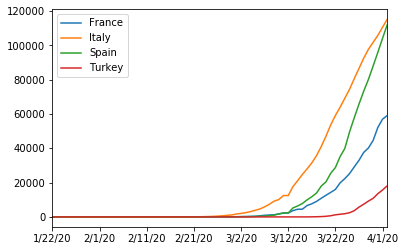

In [37]:
df_pivot.plot()

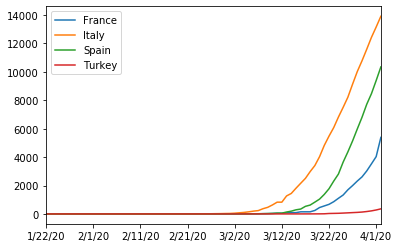

In [38]:
df_pivot_deaths.plot()

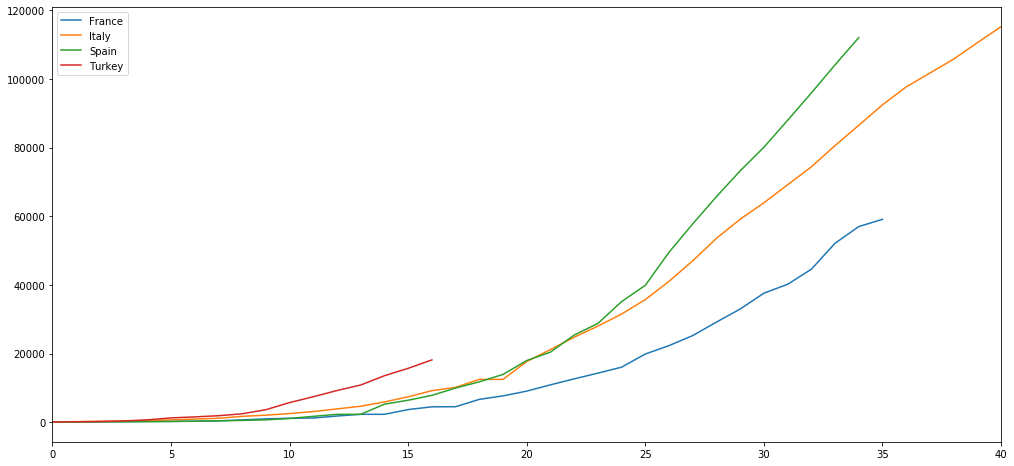

In [39]:
fig, ax = plt.subplots(1, figsize=(17,8))
for col in countries_lst:
    ts = df_pivot[df_pivot[col]>=30][col].reset_index(drop=True)
#     ts = df_pivot[col].reset_index(drop=True)
    ts.plot(ax=ax)
plt.legend()

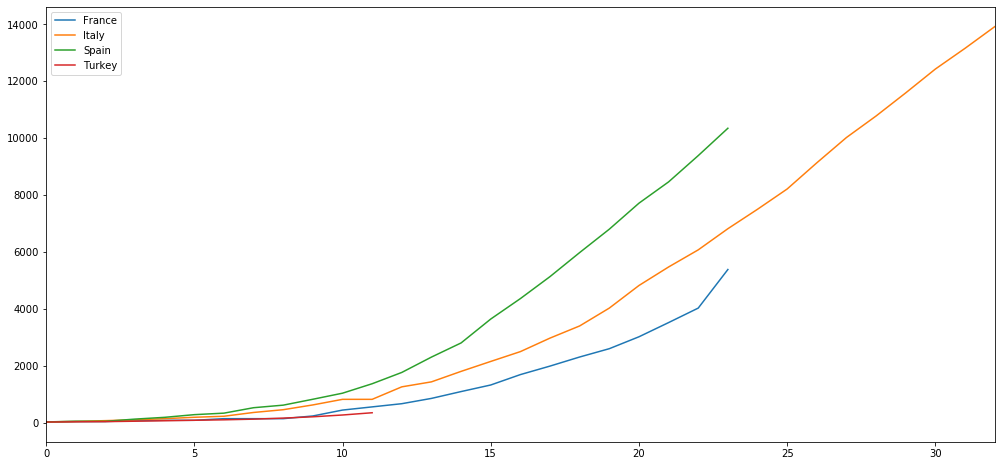

In [40]:
fig, ax = plt.subplots(1, figsize=(17,8))
for col in countries_lst:
    ts = df_pivot_deaths[df_pivot_deaths[col]>=30][col].reset_index(drop=True)
#     ts = df_pivot[col].reset_index(drop=True)
    ts.plot(ax=ax)
plt.legend()

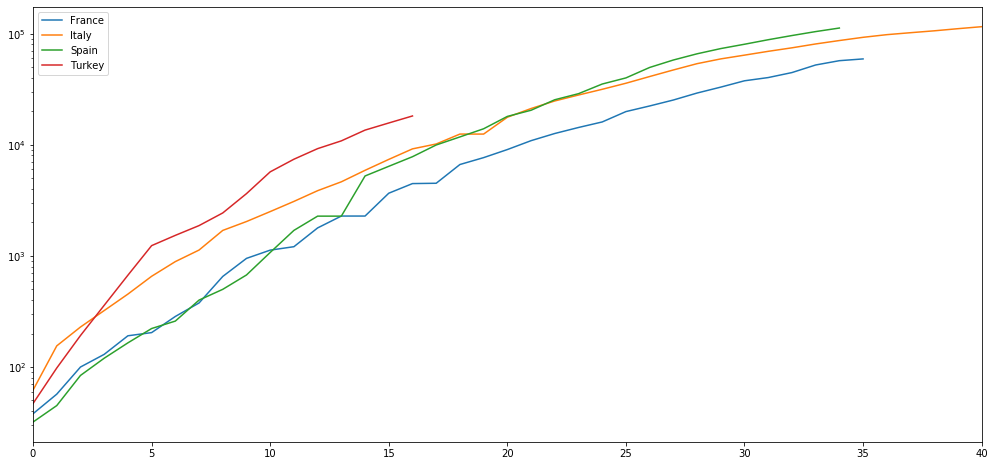

In [41]:
fig, ax = plt.subplots(1, figsize=(17,8))
for col in countries_lst:
    ts = df_pivot[df_pivot[col]>=30][col].reset_index(drop=True)
    #ts['school closure'] = descritive_df['schools']
    #ts = ts
    ts.plot(ax=ax)
plt.yscale('log')
plt.legend()

### Population ratio data

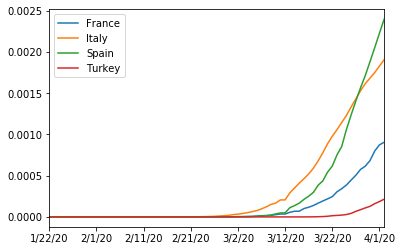

In [42]:
df_pop_ratio_pivot.plot()

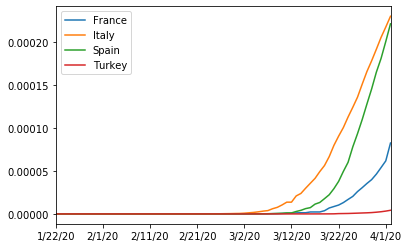

In [43]:
df_deaths_pop_ratio_pivot.plot()

## Aligning data from different countries

#### on day a given number of deaths has been reached

In [44]:
death_thresh = 50

In [45]:
# selected country data
new_ts_data = {}
for col in df_pivot_deaths.columns:
    tmp = df_pivot_deaths[col]
    selected_vals = list(tmp[tmp > death_thresh])
    new_ts_data[col] = selected_vals
df_deaths_pivot_aligned = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in new_ts_data.items() ]))



#### on day a given death population ration has been reached

In [46]:
# ratio_thresh = 1.1577553082832794e-07
ratio_thresh = 1.0e-07 # ref: an early Italian death_pop_ratio from Italy 1.0e-07

In [47]:
# selected country data
new_ts_data = {}
for col in df_deaths_pop_ratio_pivot.columns:
    tmp = df_deaths_pop_ratio_pivot[col]
    selected_vals = list(tmp[tmp > ratio_thresh])
    new_ts_data[col] = selected_vals
df_deaths_pop_ratio_pivot_aligned = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in new_ts_data.items() ]))

# full country list data
new_ts_data = {}
for col in df_deaths_pop_ratio_full_pivot.columns:
    tmp = df_deaths_pop_ratio_full_pivot[col]
    selected_vals = list(tmp[tmp > ratio_thresh])
    new_ts_data[col] = selected_vals
df_deaths_pop_ratio_full_pivot_aligned = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in new_ts_data.items() ]))

In [48]:
df_deaths_pop_ratio_pivot[df_deaths_pop_ratio_pivot['France'] >= ratio_thresh].index[0]

'3/6/20'

In [49]:
df_deaths_pop_ratio_pivot_aligned.head()

,France,Italy,Spain,Turkey
0,1.378814e-07,1.157755e-07,1.069409e-07,1.067121e-07
1,1.685217e-07,1.653936e-07,2.138819e-07,3.557070e-07
2,2.910829e-07,1.984723e-07,3.635992e-07,4.387054e-07
3,2.910829e-07,2.811691e-07,5.988693e-07,5.217037e-07
4,5.055650e-07,3.473266e-07,7.485866e-07,6.995572e-07


In [50]:
df_deaths_pop_ratio_full_pivot_aligned.head()

,Afghanistan,Albania,Algeria,Argentina,Armenia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,...,Zambia,Zimbabwe,Mozambique,Syria,Timor-Leste,Laos,Libya,Guinea-Bissau,Mali,Kosovo
0,1.027529e-07,3.474880e-07,1.596313e-07,1.327558e-07,3.374681e-07,1.110322e-07,1.972547e-07,5.876908e-07,NaN,1.058277e-07,...,NaN,NaN,NaN,1.150061e-07,NaN,NaN,1.460419e-07,NaN,1.481421e-07,5.523449e-07
1,1.027529e-07,3.474880e-07,2.052403e-07,1.770077e-07,3.374681e-07,1.110322e-07,2.958820e-07,5.876908e-07,NaN,2.116554e-07,...,NaN,NaN,NaN,1.150061e-07,NaN,NaN,NaN,NaN,1.481421e-07,5.523449e-07
2,1.027529e-07,3.474880e-07,2.508492e-07,1.991337e-07,3.374681e-07,1.110322e-07,2.958820e-07,5.876908e-07,NaN,4.233107e-07,...,NaN,NaN,NaN,1.150061e-07,NaN,NaN,NaN,NaN,NaN,5.523449e-07
3,1.027529e-07,3.474880e-07,3.420671e-07,2.876375e-07,1.012404e-06,1.110322e-07,3.945093e-07,5.876908e-07,NaN,NaN,...,NaN,NaN,NaN,1.150061e-07,NaN,NaN,NaN,NaN,NaN,5.523449e-07
4,1.027529e-07,3.474880e-07,3.876761e-07,3.982673e-07,1.012404e-06,3.330965e-07,3.945093e-07,5.876908e-07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.523449e-07


In [51]:
for c in quarantine_df['country']:
    if len(df_deaths_pop_ratio_full_pivot[df_deaths_pop_ratio_full_pivot[c] >= ratio_thresh])>0:
        quarantine_df.loc[quarantine_df['country'] == c, 'aligned_date'] = datetime.datetime.strptime(str(df_deaths_pop_ratio_full_pivot[df_deaths_pop_ratio_full_pivot[c] >= ratio_thresh].index[0]), '%m/%d/%y')
        quarantine_df.loc[quarantine_df['country'] == c, 'quarantine_delay_delta'] = (list(quarantine_df[quarantine_df['country'] == c]['quarantine_date'])[0] - list(quarantine_df[quarantine_df['country'] == c]['aligned_date'])[0])
        quarantine_df.loc[quarantine_df['country'] == c, 'quarantine_delay_days'] =str(list(quarantine_df[quarantine_df['country'] == c]['quarantine_delay_delta'])[0].days)
        #         quarantine_df.loc[quarantine_df['country'] == c, 'quarantine_delay_days_str'quarantine_df.loc[quarantine_df['country'] == c, 'quarantine_delay_delta']] = str(quarantine_df[quarantine_df['country'] == c]['quarantine_delay_delta'])
    else:
        quarantine_df.loc[quarantine_df['country'] == c, 'aligned_date'] = None
        quarantine_df.loc[quarantine_df['country'] == c, 'quarantine_delay_days'] = "n/a"
quarantine_df

,country,quarantine,quarantine_date,aligned_date,quarantine_delay_delta,quarantine_delay_days
5,Argentina,3/20/2020,2020-03-20,2020-03-24,-4 days,-4
9,Austria,3/16/2020,2020-03-16,2020-03-12,4 days,4
16,Belgium,3/18/2020,2020-03-18,2020-03-11,7 days,7
35,Colombia,3/25/2020,2020-03-25,2020-03-26,-1 days,-1
43,Czechia,3/17/2020,2020-03-17,2020-03-24,-7 days,-7
44,Denmark,3/16/2020,2020-03-16,2020-03-14,2 days,2
51,El Salvador,3/12/2020,2020-03-12,2020-03-31,-19 days,-19
60,France,3/17/2020,2020-03-17,2020-03-06,11 days,11
69,Germany,3/21/2020,2020-03-21,2020-03-14,7 days,7
86,India,3/25/2020,2020-03-25,NaT,NaT,n/a


## Plotting aligned data

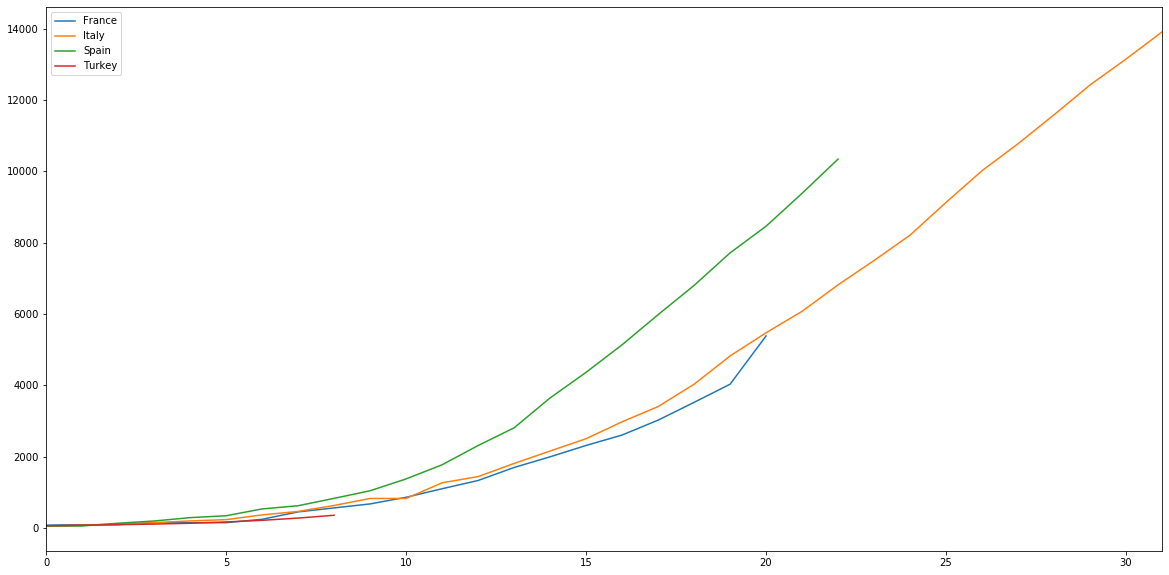

In [52]:
df_deaths_pivot_aligned.plot(figsize=(20,10))

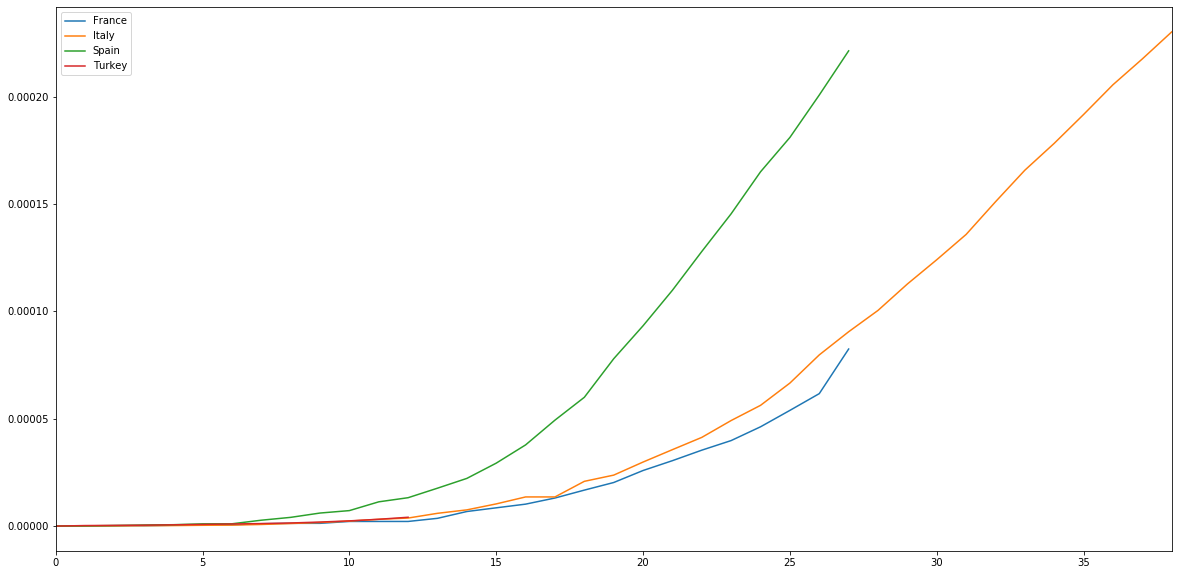

In [53]:
df_deaths_pop_ratio_pivot_aligned.plot(figsize=(20,10))

#### Listing death_pop_ratio in DECREASING order

In [54]:
max_ratio_dict = {}
daily_ratio_dict = {}
n_points = {}
nan_ratio_removed = []
superhigh_ratio_removed = []
for col in df_deaths_pop_ratio_full_pivot_aligned.columns:
#     max_ratio_dict[col] = {}
#     l = [x for x in list(df_deaths_pop_ratio_full_pivot_aligned[col]) if ~np.isnan(x)]
#     print(l)
    if np.isnan(max(df_deaths_pop_ratio_full_pivot_aligned[col])):
        nan_ratio_removed.append(col)
    elif max(df_deaths_pop_ratio_full_pivot_aligned[col]) >= 1:
        superhigh_ratio_removed.append(col)
    else:
        max_ratio_dict[col] = max(df_deaths_pop_ratio_full_pivot_aligned[col])
        n_points[col] = len([x for x in list(df_deaths_pop_ratio_full_pivot_aligned[col]) if ~np.isnan(x)])
        daily_ratio_dict[col] = max_ratio_dict[col] / n_points[col]
max_ratio_sorted_dict = {k: v for k, v in sorted(max_ratio_dict.items(), key=lambda item: item[1], reverse = True)}
daily_ratio_sorted_dict = {k: v for k, v in sorted(daily_ratio_dict.items(), key=lambda item: item[1], reverse = True)}

print('Countries removed from list because of nan:\n', nan_ratio_removed)
print('Countries removed from list because of very large (erroneous) ratio:\n', superhigh_ratio_removed)

Countries removed from list because of nan:
 ['Bangladesh', 'Benin', 'Cambodia', 'Central African Republic', 'Chad', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Georgia', 'Guatemala', 'Guinea', 'Haiti', 'India', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Liberia', 'Madagascar', 'Mongolia', 'Namibia', 'Nepal', 'Nigeria', 'Rwanda', 'Senegal', 'Somalia', 'South Africa', 'Sudan', 'Tanzania', 'Uganda', 'Uzbekistan', 'Vietnam', 'Zambia', 'Zimbabwe', 'Mozambique', 'Timor-Leste', 'Laos', 'Guinea-Bissau']
Countries removed from list because of very large (erroneous) ratio:
 []


In [55]:
for x in list(max_ratio_sorted_dict)[0:40]:
    print ("{}\t{}\t({} days \t per_day {})".format(x,  max_ratio_sorted_dict[x], n_points[x], (max_ratio_sorted_dict[x]/ n_points[x])))
    

Italy	0.00023014521592516906	(39 days 	 per_day 5.901159382696643e-06)
Spain	0.00022132497346046643	(28 days 	 per_day 7.904463337873801e-06)
Belgium	8.723320853491093e-05	(23 days 	 per_day 3.7927481971700405e-06)
France	8.252964973800782e-05	(28 days 	 per_day 2.9474874906431363e-06)
Netherlands	7.814473315003462e-05	(26 days 	 per_day 3.005566659616716e-06)
Switzerland	6.193222534733464e-05	(29 days 	 per_day 2.135593977494298e-06)
United Kingdom	4.302801058674666e-05	(23 days 	 per_day 1.870783068988985e-06)
Iran	3.762220564490479e-05	(39 days 	 per_day 9.646719396129433e-07)
Sweden	3.049726886065471e-05	(20 days 	 per_day 1.5248634430327356e-06)
Denmark	2.1235447244415855e-05	(20 days 	 per_day 1.0617723622207927e-06)
Portugal	2.0496809313671694e-05	(16 days 	 per_day 1.2810505821044809e-06)
Ireland	1.9846951649990503e-05	(23 days 	 per_day 8.629109413039349e-07)
US	1.7903179875136407e-05	(23 days 	 per_day 7.783991250059308e-07)
Austria	1.7543084371798805e-05	(22 days 	 per_day 7

In [56]:
for x in list(daily_ratio_sorted_dict)[0:40]:
    print ("{}\t{}\t({} days)".format(x,  daily_ratio_sorted_dict[x], n_points[x]))
    

Spain	7.904463337873801e-06	(28 days)
Italy	5.901159382696643e-06	(39 days)
Belgium	3.7927481971700405e-06	(23 days)
Netherlands	3.005566659616716e-06	(26 days)
France	2.9474874906431363e-06	(28 days)
Switzerland	2.135593977494298e-06	(29 days)
United Kingdom	1.870783068988985e-06	(23 days)
Sweden	1.5248634430327356e-06	(20 days)
Portugal	1.2810505821044809e-06	(16 days)
Denmark	1.0617723622207927e-06	(20 days)
Iran	9.646719396129433e-07	(39 days)
Estonia	9.213644737773389e-07	(9 days)
Ireland	8.629109413039349e-07	(23 days)
Austria	7.974129259908548e-07	(22 days)
US	7.783991250059308e-07	(23 days)
Cyprus	6.902117210650133e-07	(12 days)
Germany	6.6062778473708e-07	(20 days)
Romania	4.981540317563752e-07	(12 days)
Norway	4.6114902473437357e-07	(20 days)
North Macedonia	4.399914113676501e-07	(12 days)
Mauritius	4.233960427228382e-07	(13 days)
Czechia	4.1087009118794776e-07	(10 days)
Slovenia	4.0886260196311774e-07	(20 days)
Trinidad and Tobago	3.9697057463554926e-07	(9 days)
Bosnia and H

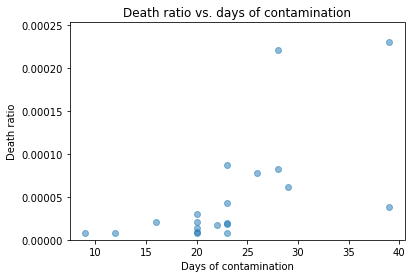

In [57]:
thex = [n_points[x] for x in list(max_ratio_sorted_dict)[0:20]]
they = [max_ratio_sorted_dict[x] for x in list(max_ratio_sorted_dict)[0:20]]
    
plt.scatter(thex, they, alpha=0.5)
plt.title('Death ratio vs. days of contamination')
plt.xlabel('Days of contamination')
plt.ylabel('Death ratio')
# plt.xlim(-1, 1)
plt.ylim(0, max(they)+0.1*max(they))
plt.show()


Text(0, 0.5, 'Daily population death ratio since start of contamination')

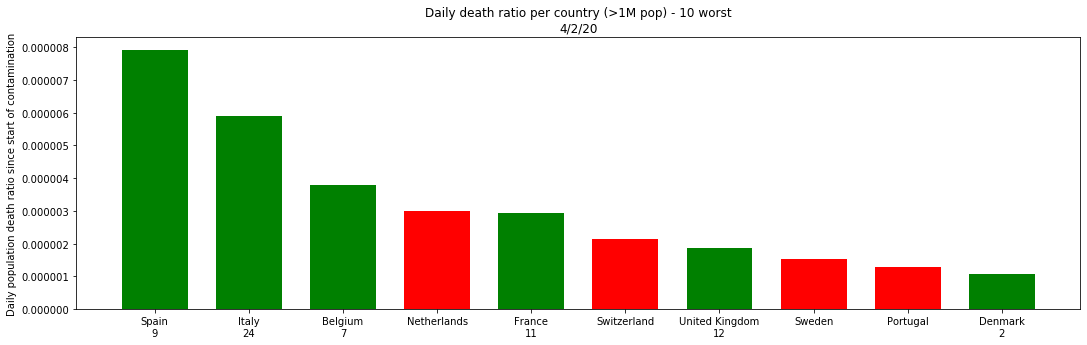

In [58]:
thex = [str(x)+str('\n')+str(list(quarantine_df[quarantine_df['country'] == x]['quarantine_delay_days'])[0]) if x in list(quarantine_df['country']) else str(x) for x in list(daily_ratio_sorted_dict)[0:10]]
they = [daily_ratio_sorted_dict[x] for x in list(daily_ratio_sorted_dict)[0:10]]
thecolour = ['g' if x in quarantine_countries else 'r' for x in list(daily_ratio_sorted_dict)[0:10]]

f, ax = plt.subplots(figsize=(18,5))
plt.bar(thex, they, color = thecolour, width=0.7)
plt.title('Daily death ratio per country (>1M pop) - 10 worst\n'+str(last_date))
plt.ylabel('Daily population death ratio since start of contamination')

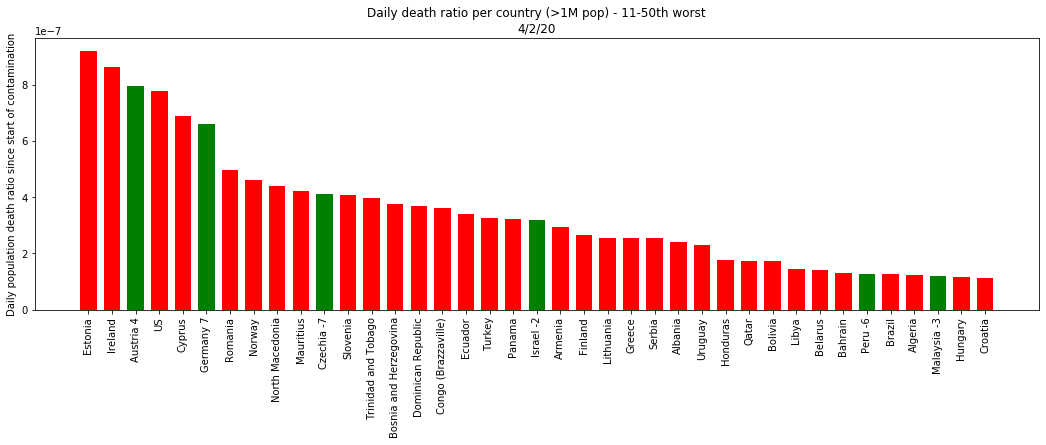

In [59]:
thex = [str(x)+str(' ')+str(list(quarantine_df[quarantine_df['country'] == x]['quarantine_delay_days'])[0]) if x in list(quarantine_df['country']) else str(x) for x in list(daily_ratio_sorted_dict)[11:50]]
# thex = [x for x in list(daily_ratio_sorted_dict)[11:50]]
they = [daily_ratio_sorted_dict[x] for x in list(daily_ratio_sorted_dict)[11:50]]
thecolour = ['g' if x in quarantine_countries else 'r' for x in list(daily_ratio_sorted_dict)[11:50]]

f, ax = plt.subplots(figsize=(18,5))
plt.bar(thex, they, color = thecolour, width=0.7)
plt.title('Daily death ratio per country (>1M pop) - 11-50th worst\n'+str(last_date))
plt.ylabel('Daily population death ratio since start of contamination')
plt.xticks(rotation=90);

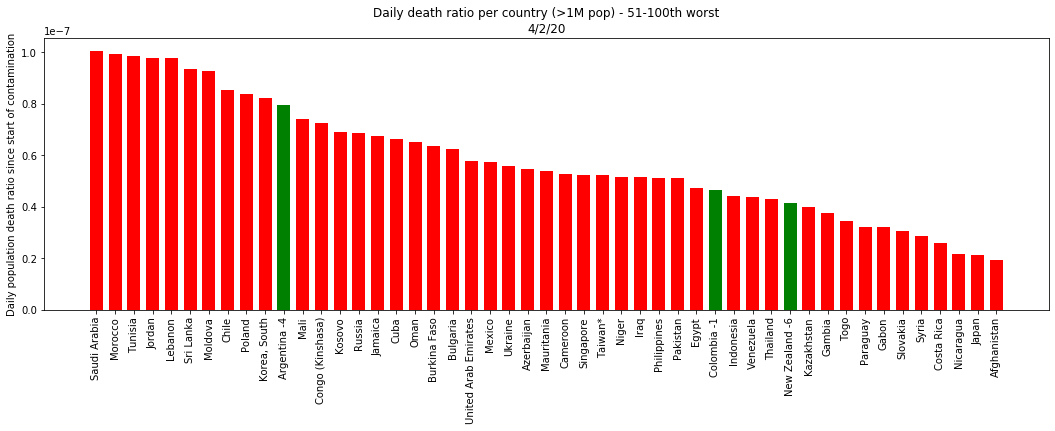

In [60]:
thex = [str(x)+str(' ')+str(list(quarantine_df[quarantine_df['country'] == x]['quarantine_delay_days'])[0]) if x in list(quarantine_df['country']) else str(x) for x in list(daily_ratio_sorted_dict)[51:100]]
# thex = [x for x in list(daily_ratio_sorted_dict)[51:100]]
they = [daily_ratio_sorted_dict[x] for x in list(daily_ratio_sorted_dict)[51:100]]
thecolour = ['g' if x in quarantine_countries else 'r' for x in list(daily_ratio_sorted_dict)[51:100]]

f, ax = plt.subplots(figsize=(18,5))
plt.bar(thex, they, color = thecolour, width=0.7)
plt.title('Daily death ratio per country (>1M pop) - 51-100th worst\n'+str(last_date))
plt.ylabel('Daily population death ratio since start of contamination')
plt.xticks(rotation=90);

## Growth

In [61]:
df_pivot[['{}_growth'.format(col) for col in countries_lst]] = df_pivot.diff()/df_pivot

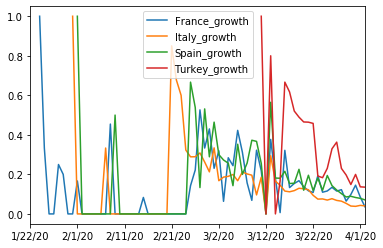

In [62]:
df_pivot.filter(regex='growth').plot()

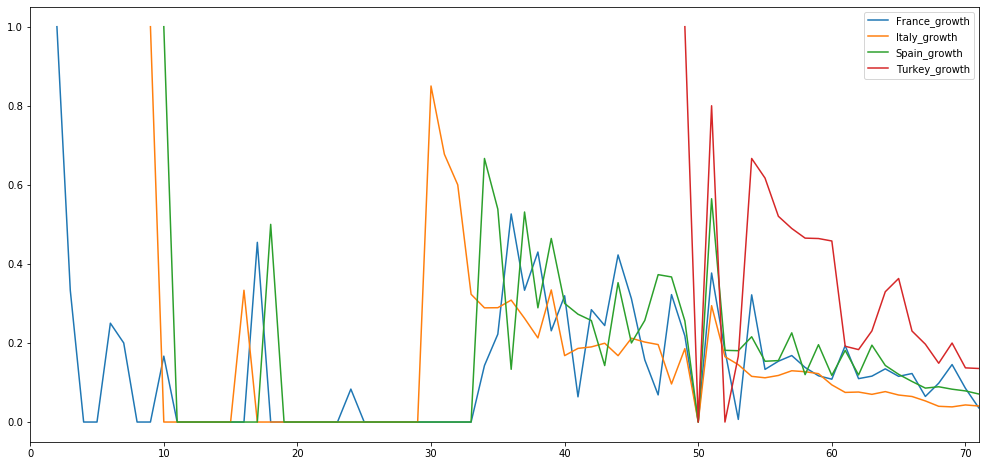

In [63]:
fig, ax = plt.subplots(1, figsize=(17,8))
growth = df_pivot.filter(regex='growth').columns
for col in growth:
    ts = df_pivot[col].reset_index(drop=True)
    ts.plot(ax=ax)
plt.legend()